In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='dark')
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#Loading in the dataset 
df = pd.read_csv('categorized_ecommerce.csv', header=0, parse_dates=True, infer_datetime_format=True)

In [3]:
#Viewing the dataset
df

,InvoiceDate,Description,Quantity,UnitPrice,Country,Total,Categories
0,12/1/2010,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,UNITED KINGDOM,15.3,HOME AND OFFICE DECOR
1,12/1/2010,WHITE METAL LANTERN,6,3.39,UNITED KINGDOM,20.3,HOME AND OFFICE DECOR
2,12/1/2010,CREAM CUPID HEARTS COAT HANGER,8,2.75,UNITED KINGDOM,22.0,HOME AND OFFICE DECOR
3,12/1/2010,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,UNITED KINGDOM,20.3,PERSONAL
4,12/1/2010,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,UNITED KINGDOM,20.3,HOME AND OFFICE DECOR
...,...,...,...,...,...,...,...
527573,3/21/2011,REVOLVER WOODEN RULER,1,1.95,FRANCE,2.0,GIFTS
527574,3/21/2011,RED RETROSPOT OVEN GLOVE,2,1.25,FRANCE,2.5,HOME AND OFFICE DECOR
527575,3/21/2011,SET OF 2 TEA TOWELS APPLE AND PEARS,1,2.95,FRANCE,3.0,GIFTS
527576,3/21/2011,STRAWBERRY FAIRY CAKE TEAPOT,2,4.95,FRANCE,9.9,HOME AND OFFICE DECOR


In [4]:
#creating a new column which contains the extracted month from the InvoiceDate column
df['Month'] = pd.to_datetime(df['InvoiceDate']).dt.month

In [5]:
first_grouping = df.groupby(['Categories', 'Month'])['Total'].sum().reset_index()

In [6]:
first_grouping

,Categories,Month,Total
0,GIFTS,1,164476.0
1,GIFTS,2,132730.6
2,GIFTS,3,211610.7
3,GIFTS,4,149076.3
4,GIFTS,5,209613.1
...,...,...,...
67,STATIONARY,8,12678.4
68,STATIONARY,9,15514.5
69,STATIONARY,10,20168.6
70,STATIONARY,11,27391.4


In [7]:
#This is grouping the dataset Total column by the category and month columns respectively
monthly_sales = first_grouping.groupby(by=['Categories', 'Month'])['Total'].sum()

In [8]:
monthly_sales

Categories  Month
GIFTS       1        164476.0
            2        132730.6
            3        211610.7
            4        149076.3
            5        209613.1
                       ...   
STATIONARY  8         12678.4
            9         15514.5
            10        20168.6
            11        27391.4
            12        15345.3
Name: Total, Length: 72, dtype: float64

In [9]:
#Turning the monthly_sales into a pandas dataframe
monthly_sales = pd.DataFrame(monthly_sales)

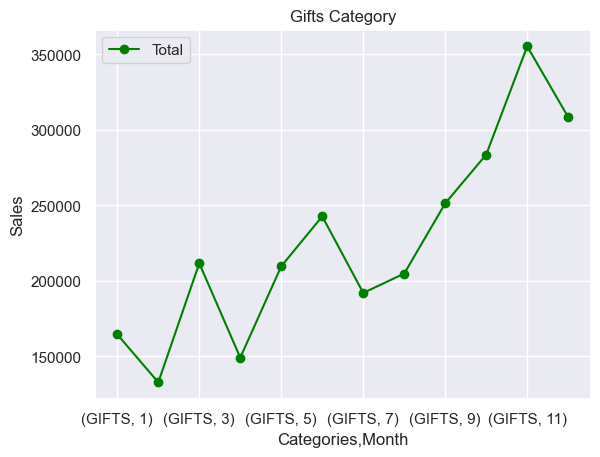

In [10]:
#Plotting the dataset with Gifts items filtered out
monthly_sales.query("Categories=='GIFTS'").plot(marker='o', color='green')
plt.ylabel('Sales')
plt.title('Gifts Category')
plt.grid()

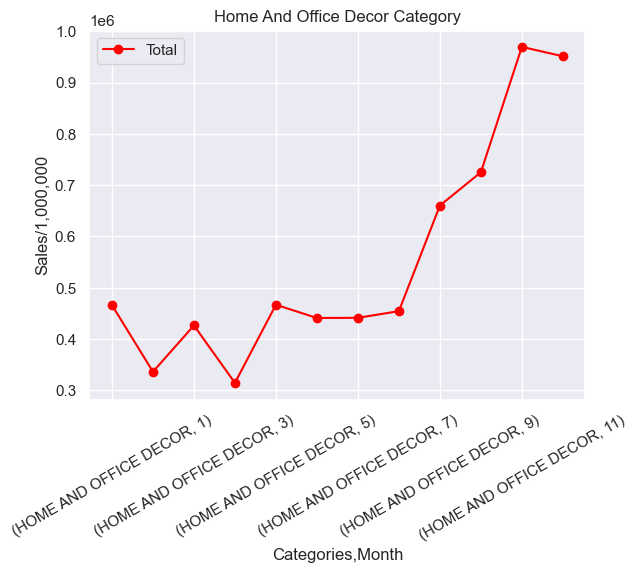

In [11]:
#Plotting the dataset with Home and Office Decor items filtered out
monthly_sales.query("Categories=='HOME AND OFFICE DECOR'").plot(marker='o', color='red')
plt.title('Home And Office Decor Category')
plt.xticks(rotation=30)
plt.ylabel('Sales/1,000,000')
plt.grid()

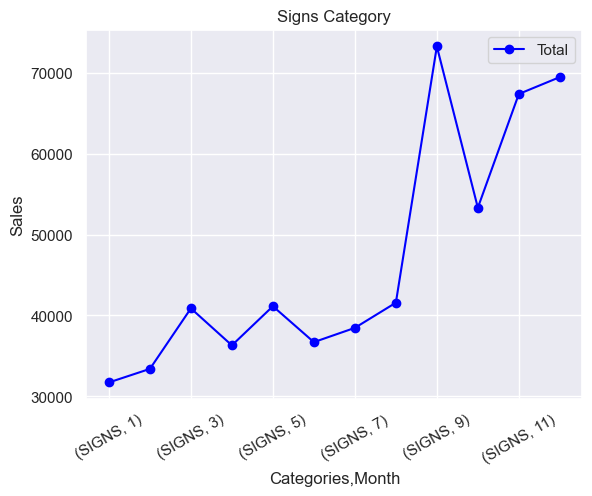

In [12]:
#Plotting the dataset with signs items filtered out
monthly_sales.query("Categories=='SIGNS'").plot(marker='o', color='blue')
plt.ylabel('Sales')
plt.title('Signs Category')
plt.xticks(rotation=30)
plt.grid()

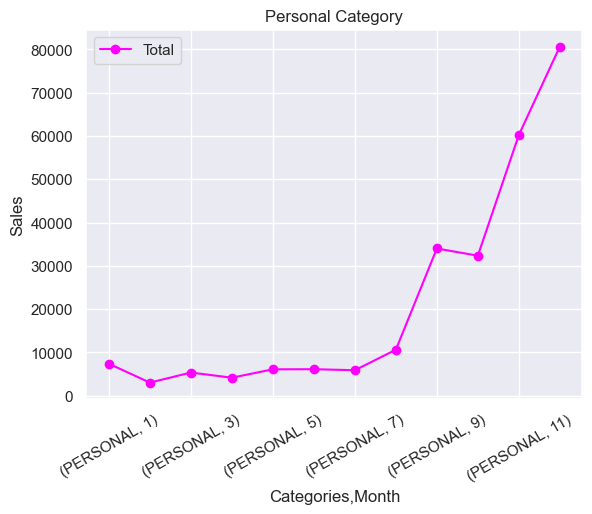

In [13]:
#Plotting the dataset with Personal items filtered out
monthly_sales.query("Categories=='PERSONAL'").plot(marker='o', color='magenta')
plt.ylabel('Sales')
plt.title('Personal Category')
plt.xticks(rotation=30)
plt.grid()

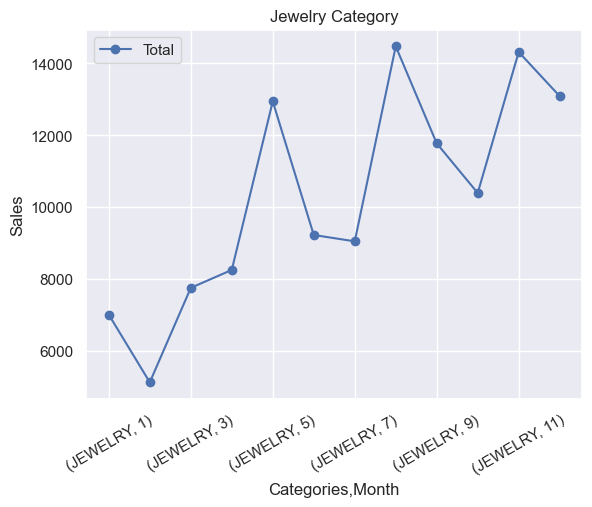

In [14]:
#Plotting the dataset with Jewelry items filtered out
monthly_sales.query("Categories=='JEWELRY'").plot(marker='o')
plt.ylabel('Sales')
plt.title('Jewelry Category')
plt.xticks(rotation=30)
plt.grid()

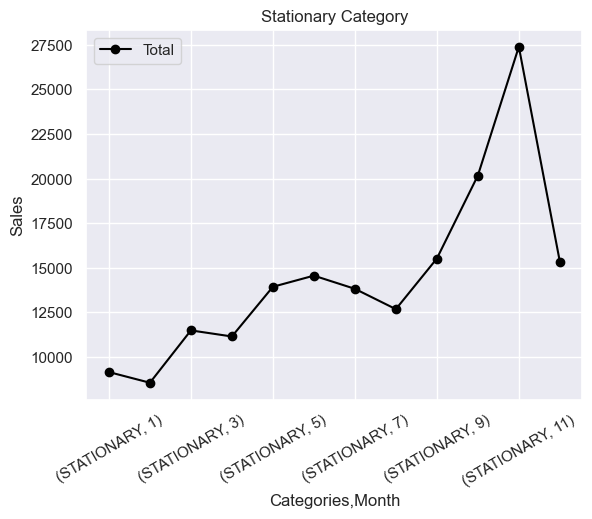

In [15]:
#Plotting the dataset with Stationary items filtered out
monthly_sales.query("Categories=='STATIONARY'").plot(marker='o', color='black')
plt.ylabel('Sales')
plt.title('Stationary Category')
plt.xticks(rotation=30)
plt.grid()